# 01 主成分分析法（Principal Component Analysis）
- 一个非监督的机器学习算法
- 主要用于数据的降维
- 通过降维，可以发现更便于人类理解的特征
- 其他应用：可视化；去噪

<br>

- 如何找到这个让样本间间距最大的轴
- 如何定义样本间间距？
- 使用方差（Variance)
$$\operatorname{Var}(x)=\frac{1}{m} \sum_{i=1}^{m}\left(x_{i}-\bar{x}\right)^{2}$$

### 具体方法
- 对所有的样本进行 demean 处理（将样例均值归为0）
- 我们想要求一个轴的方向 $w= (w1, w2) $
- 使得我们所有的样本，映射到以后，有：
$$\operatorname{Var}\left(X_{\text {project}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(X_{\text {project}}^{(i)}-\bar{X}_{\text {project}}\right)^{2} \mbox{最大}$$
$$\xrightarrow{向量化}\operatorname{Var}\left(X_{\text {project}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left\|X_{\text {project}}^{(i)}-\bar{X}_{\text {project}}\right\|^{2} 最大$$
$$即\operatorname{Var}\left(X_{\text {project}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left\|X_{\text {project}}^{(i)}\right\|^{2}最大$$

$$目标：求w，使得\operatorname{Var}\left(X_{\text {project}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(X^{(i)} \cdot w\right)^{2}最大$$
$$推广到多维：\operatorname{Var}\left(X_{\text {project}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(X_{1}^{(i)} w_{1}+X_{2}^{(i)} w_{2}+\ldots+X_{n}^{(i)} w_{n}\right)^{2}\rightarrow \operatorname{Var}\left(X_{\text {project}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(\sum_{j=1}^{n} X_{j}^{(i)} w_{j}\right)^{2}$$

一个目标函数的最优化问题，使用梯度上升法解决

# 02 梯度上升法解決主成分分析问题

$$目标：求w，使得f(X)=\frac{1}{m} \sum_{i=1}^{m}\left(X_{1}^{(i)} w_{1}+X_{2}^{(i)} w_{2}+\ldots+X_{n}^{(i)} w_{n}\right)^{2}最大$$

推导：
$$\nabla f=\left(\begin{array}{c}
{\frac{\partial f}{\partial w_{1}}} \\
{\frac{\partial f}{\partial w_{2}}} \\
{\cdots} \\
{\frac{\partial f}{\partial w_{n}}}
\end{array}\right)=\frac{2}{m}\left(\begin{array}{c}
{\sum_{i=1}^{m}\left(X_{1}^{(i)} w_{1}+X_{2}^{(i)} w_{2}+\ldots+X_{n}^{(i)} w_{n}\right) X_{1}^{(i)}} \\
{\sum_{i=1}^{m}\left(X_{1}^{(i)} w_{1}+X_{2}^{(i)} w_{2}+\ldots+X_{n}^{(i)} w_{n}\right) X_{2}^{(i)}} \\
{\cdots} \\
{\sum_{i=1}^{m}\left(X_{1}^{(i)} w_{1}+X_{2}^{(i)} w_{2}+\ldots+X_{n}^{(i)} w_{n}\right) X_{n}^{(i)}}
\end{array}\right)=\frac{2}{m}\left(\begin{array}{c}
{\sum_{i=1}^{m}\left(X^{(i)} w\right) X_{1}^{(i)}} \\
{\sum_{i=1}^{m}\left(X^{(i)} w\right) X_{2}^{(i)}} \\
{\cdots} \\
{\sum_{i=1}^{m}\left(X^{(i)} w\right) X_{n}^{(i)}}
\end{array}\right)$$

$$\longrightarrow =\frac{2}{m} \cdot(X w)^{T} \cdot X = \frac{2}{m} \cdot X^{T}(X w)$$

# 03 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

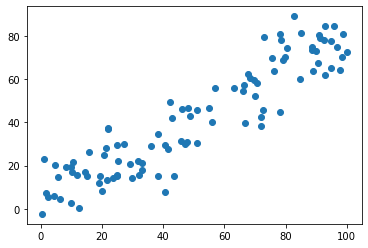

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

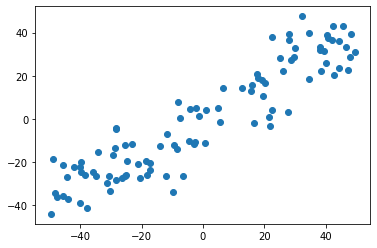

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [7]:
np.mean(X_demean[:,0])

1.1652900866465642e-14

In [8]:
np.mean(X_demean[:,1])

-1.9184653865522706e-14

### 梯度上升法

In [9]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)


def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)


def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res


def direction(w):  # 向量单位化
    return w / np.linalg.norm(w)


def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):

    cur_iter = 0
    w = direction(initial_w)
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注：每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [10]:
initial_w = np.random.random(X.shape[1])  # 注：不能从0向量开始
initial_w

array([0.02378065, 0.49361411])

In [11]:
eta = 0.001

In [12]:
# 注：不能使用StandarScaler标准化数据
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77731118, 0.62911631])

In [13]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.77731118, 0.62911631])

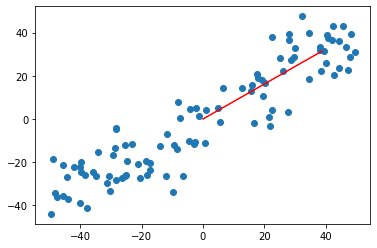

In [14]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 50], [0, w[1] * 50], color='r')
plt.show()

In [15]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3. 

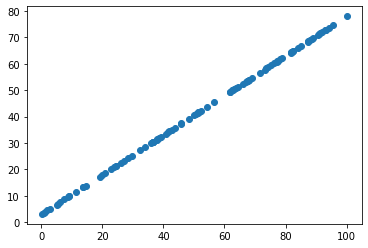

In [16]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

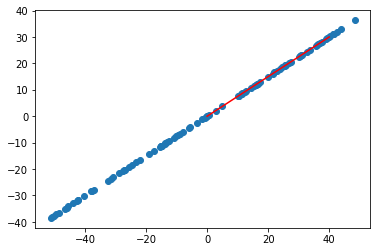

In [17]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0] * 50], [0, w2[1] * 50], color='r')
plt.show()

# 04 求数据的前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

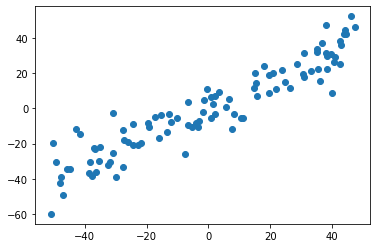

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)


def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):  # 向量单位化
    return w / np.linalg.norm(w)


def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):

    cur_iter = 0
    w = direction(initial_w)
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注：每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [6]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.77282605, 0.63461792])

In [7]:
#X2 = np.empty(X.shape)
#for i in range(len(X)):
    #X2[i] = X[i] - X[i].dot(w) * w

In [8]:
# 向量化改写

X2 = X - X.dot(w).reshape(-1, 1) * w

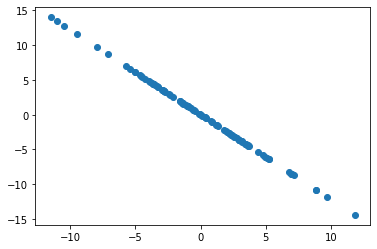

In [9]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [10]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.63461358,  0.77282961])

In [11]:
w.dot(w2)

5.605792932961151e-06

In [14]:
def first_n_component(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca,initial_w,eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [15]:
first_n_component(2, X)

[array([0.77282603, 0.63461794]), array([-0.63461406,  0.77282922])]

In [16]:
first_n_component(2, X)[0].dot(first_n_component(2, X)[1])

7.564546139982031e-06

# 05 高维数据映射为低维数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
from playML.PCA import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
pca.components_

array([[ 0.76608748,  0.64273631],
       [-0.64273229,  0.76609086]])

In [5]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [6]:
X_reduction = pca.tranform(X)

In [7]:
X_reduction.shape

(100, 1)

In [8]:
X_restore = pca.inverse_transform(X_reduction)

In [9]:
X_restore.shape

(100, 2)

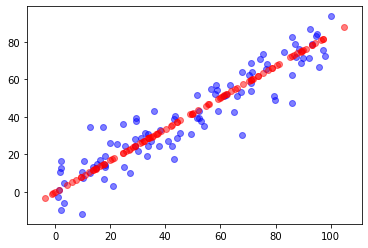

In [10]:
# 绘制
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5)
plt.show()

# 06 scikit-learn中的PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.components_

array([[0.7660875 , 0.64273629]])

In [14]:
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

In [15]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

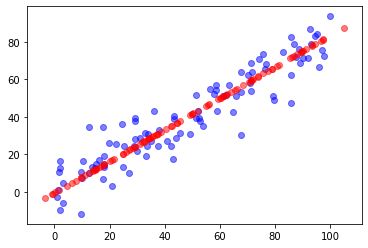

In [16]:
# 绘制
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5)
plt.show()

### 使用真实数据的情况

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
X_train.shape

(1347, 64)

In [5]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 31.1 ms, sys: 21.4 ms, total: 52.5 ms
Wall time: 83.5 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
knn_clf.score(X_test,y_test)

0.9866666666666667

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [8]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 1.76 ms, sys: 919 µs, total: 2.67 ms
Wall time: 1.77 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
knn_clf.score(X_test_reduction,y_test)

0.6066666666666667

In [10]:
pca.explained_variance_ratio_  #解释原数据方差的比例

array([0.14566817, 0.13735469])

In [11]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

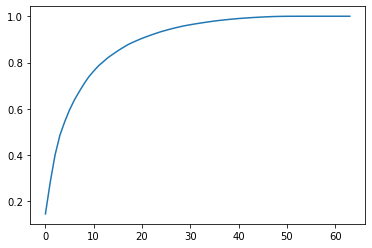

In [12]:
plt.plot([i for i in range(X_train.shape[1])],\
         [np.sum(pca.explained_variance_ratio_[:i+1] ) for i in range(X_train.shape[1])])
plt.show()

In [13]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.n_components_

28

In [15]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [16]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 2.81 ms, sys: 1.19 ms, total: 4 ms
Wall time: 4.2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn_clf.score(X_test_reduction,y_test)

0.98

In [18]:
pca = PCA(n_components=2)
pca.fit(X)
X_rediction = pca.transform(X)

In [19]:
X_rediction.shape

(1797, 2)

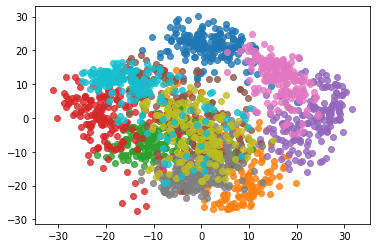

In [20]:
for i in range(10):
    plt.scatter(X_rediction[y==i,0], X_rediction[y==i,1],alpha=0.8)
plt.show()

# 07 试手MNIST数据集

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
# 原版from sklearn.datasets import fetch_mldata  已弃用after0.20
# DEPRECATED: fetch mldata was deprecated in version 0.20 and will be removed in version 0.22

In [2]:
mnist = fetch_openml('mnist_784')
# 原版方法随之弃用 mnist = fetch_mldata("MNIST original")

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [4]:
X, y = mnist['data'],mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
X_train = np.array(X[:60000],dtype=float)
y_train = np.array(y[:60000],dtype=float)
X_test = np.array(X[60000:],dtype=float)
y_test = np.array(y[60000:],dtype=float)

## 使用 kNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

CPU times: user 19.4 s, sys: 232 ms, total: 19.6 s
Wall time: 20.4 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
%time knn_clf.score(X_test, y_test)

CPU times: user 11min 26s, sys: 2.22 s, total: 11min 28s
Wall time: 11min 32s


0.9688

## 使用PCA降维

In [9]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [10]:
X_train_reduction.shape

(60000, 87)

In [11]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

CPU times: user 460 ms, sys: 4.52 ms, total: 464 ms
Wall time: 469 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
X_test_reduction = pca.transform(X_test)

In [14]:
%time knn_clf.score(X_test_reduction, y_test)

CPU times: user 56.8 s, sys: 169 ms, total: 56.9 s
Wall time: 57.3 s


0.9728

# 08 使用PCA对数据进行降噪

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5, size=100)

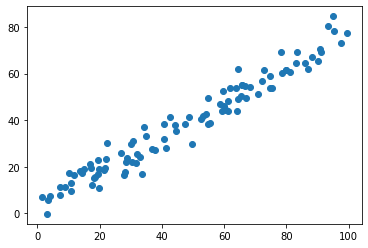

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

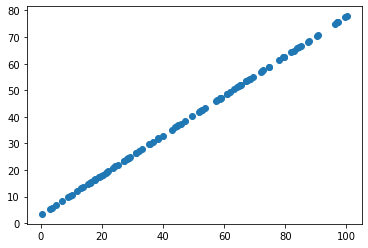

In [7]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

## 手写识别的例子

In [8]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [11]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [12]:
example_digits.shape

(100, 64)

In [15]:
def plot_digits(data):
    fig, axes = plt.subplots(10,\
                             10,\
                             figsize=(10, 10),\
                             subplot_kw={
                                 'xticks': [],\
                                 'yticks': []
                             },\
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),\
                  cmap='binary',\
                  interpolation='nearest',\
                  clim=(0, 16))
    plt.show()

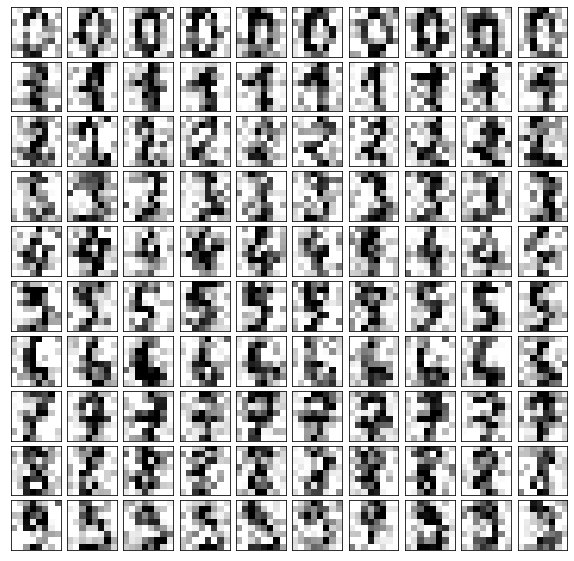

In [16]:
plot_digits(example_digits)

In [17]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca.n_components_

12

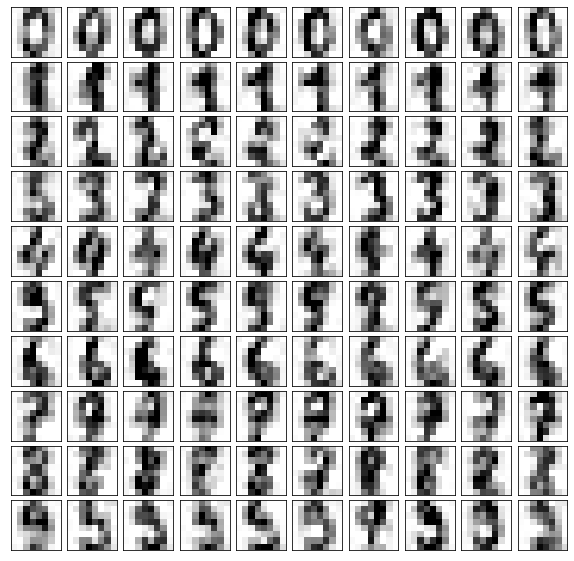

In [19]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

# 09 人脸识别与特征脸

## 高维数据向低维数据映射

$$X=\left(\begin{array}{cccc}
X_{1}^{(1)} & X_{2}^{(1)} & \dots & X_{n}^{(1)} \\
X_{1}^{(2)} & X_{2}^{(2)} & \dots & X_{n}^{(2)} \\
\dots & \dots & \dots & \dots \\
X_{1}^{(m)} & X_{2}^{(m)} & \dots & X_{n}^{(m)}
\end{array}\right)$$
$$W_{k}=\left(\begin{array}{cccc}
W_{1}^{(1)} & W_{2}^{(1)} & \ldots & W_{n}^{(1)} \\
W_{1}^{(2)} & W_{2}^{(2)} & \ldots & W_{n}^{(2)} \\
\ldots & \ldots & \ldots & \ldots \\
W_{1}^{(k)} & X_{2}^{(k)} & \ldots & X_{n}^{(k)}
\end{array}\right)$$
$$X \cdot W_{k}^{T}=X_{k}$$

### 特称脸

(出错了……就先不运行了)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people()# 这一步 应该是维度不相称……不太会改……留个坑……看以后有没有机会

ValueError: could not broadcast input array from shape (40,36) into shape (62,47)

以下是之后的课程代码

```python3

random_indexes = np.random.permutation(len(face.data))
X = face.data(random_indexes)

example_faces = X[:36,:] # shape (36, 2914) 


def plot_faces(faces):
    fig, axes = plt.subplots(6,\
                             6,\
                             figsize=(10, 10),\
                             subplot_kw={
                                 'xticks': [],\
                                 'yticks': []
                             },\
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47),\
                  cmap='bone')
    plt.show()
    
plot_faces(example_faces)

# 特征脸

from sklearn.deomposition import PCA

pca = PCA(svd_sovler='randomized')
pca.fit(X)

plot_faces(pca.components_[:36,:]) # 打印特征脸


```
